# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv"
df = pd.read_csv(url)
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [3]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

In [4]:
knn = KNeighborsRegressor()
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
cv_scores = cross_val_score(knn, X, y, cv=5, scoring="r2")
base_knn_score = cv_scores.mean()
base_knn_score

0.6086269321400684

# Scale sensitivity

In [5]:
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)
X_rescaled
cv_scores_rescaled = cross_val_score(knn, X_rescaled, y, cv=5, scoring="r2")
rescaled_score = cv_scores_rescaled.mean()
rescaled_score

0.649019431450802

# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [6]:
scores = []
for k in range(1, 26):
    knn_n = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn_n, X_rescaled, y, cv=5, scoring="r2")
    scores.append(cv_scores.mean())
scores

[0.48636852532615826,
 0.6265166521948929,
 0.6367292571826118,
 0.6427543442871828,
 0.649019431450802,
 0.6525063383583541,
 0.6534465032844385,
 0.6527528857803553,
 0.6557291702495226,
 0.6561595932805352,
 0.6572076193027874,
 0.6556437066660508,
 0.6564425387293127,
 0.653114355313272,
 0.6505564010024717,
 0.6508131765800867,
 0.6490638049126517,
 0.6468679222537144,
 0.6434930484240448,
 0.6426744550227192,
 0.6409583369607608,
 0.6397995813287215,
 0.6379430256622171,
 0.6364680254037437,
 0.6351857216184216]

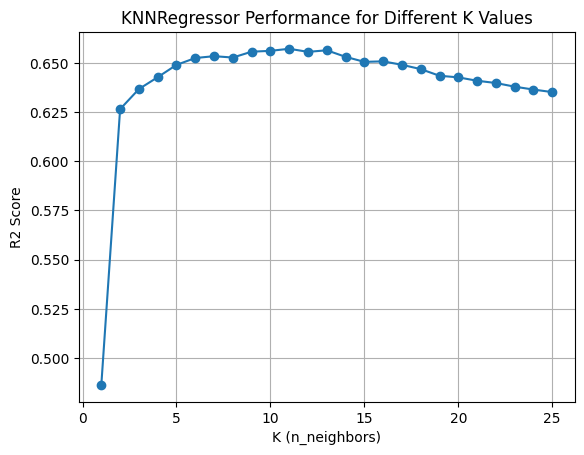

In [7]:
plt.plot(np.arange(1, 26), scores, marker="o")
plt.xlabel("K (n_neighbors)")
plt.ylabel("R2 Score")
plt.title("KNNRegressor Performance for Different K Values")
plt.grid(True)
plt.show()

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [8]:
best_k_index = np.argmax(scores)
best_k_index
best_k = best_k_index + 1
best_k

11

# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

In [9]:
knn_2 = KNeighborsRegressor(n_neighbors=2)
train_sizes, train_scores, val_scores = learning_curve(
    knn_2,
    X_rescaled,
    y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


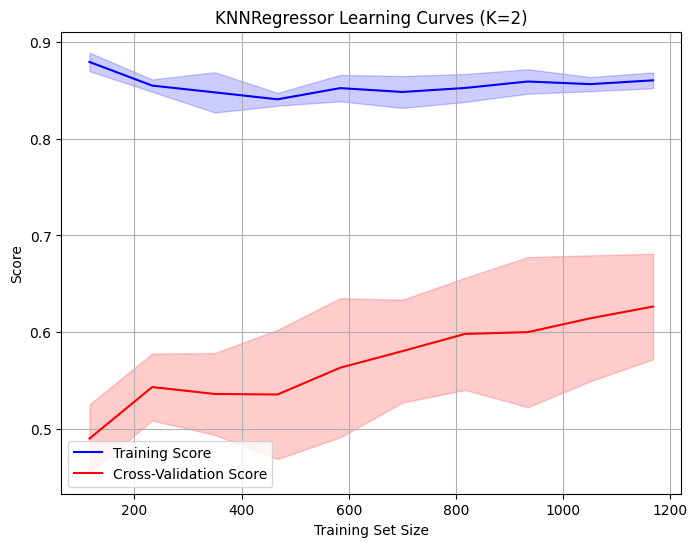

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="b")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="b"
)
plt.plot(train_sizes, val_scores_mean, label="Cross-Validation Score", color="r")

plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.2,
    color="r"
)
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("KNNRegressor Learning Curves (K=2)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Ideal K

In [11]:
knn_11_n = KNeighborsRegressor(n_neighbors=11)

train_sizes, train_scores, val_scores = learning_curve(
    knn_11_n,
    X_rescaled,
    y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

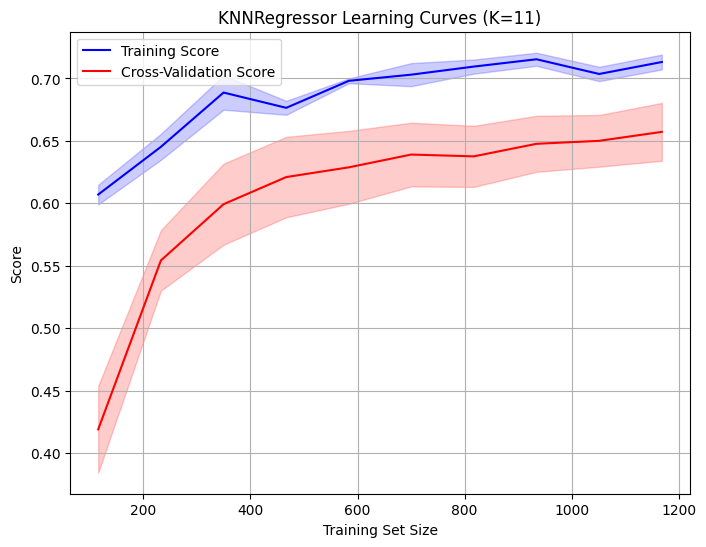

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", color="b")

plt.fill_between(
    train_sizes,
    np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
    alpha=0.2,
    color="b"
)
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Cross-Validation Score", color="r")

plt.fill_between(
    train_sizes,
    np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
    np.mean(val_scores, axis=1) + np.std(val_scores, axis=1),
    alpha=0.2,
    color="r"
)
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("KNNRegressor Learning Curves (K=11)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [13]:
knn_11_n.fit(X_rescaled, y)
y_pred = knn_11_n.predict(X_rescaled)

price_error = mean_absolute_error(y, y_pred)
price_error

27744.10255292653

# Model Selection

In [14]:
linear_reg = LinearRegression()
knn_cv_scores = cross_val_score(knn_11_n, X_rescaled, y, cv=5, scoring="r2")
mean_knn_score = knn_cv_scores.mean()
linear_reg_cv_scores = cross_val_score(linear_reg, X_rescaled, y, cv=5, scoring="r2")
mean_linear_reg_score = linear_reg_cv_scores.mean()
if mean_knn_score > mean_linear_reg_score:
    best_model = "KNN"
else:
    best_model = "LinearReg"
print(best_model)

KNN


# 🏁